In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


from matplotlib import gridspec
from datetime import datetime

In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(df.info())
    display(df.head())
    display(df.describe().T)
    display(df.nunique())

In [3]:
# Déclaration d'une fonction

def make_labels(ax, boxplot, tab, s_col, p_col):
    
# Récupération des instances boxplot
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

# Positionnement x de la ligne médiane
    xpos = med.get_xdata()

# Texte positionné avec un décalage horizontale 
# Fraction de la largeur de la boxplot
    xoff = 0.10 * (xpos[1] - xpos[0])

# Position x des étiquettes
    xlabel = xpos[1] + xoff

# Position y de la ligne médiane
    median = med.get_ydata()[1]

# Position des 25ème et 75ème percentiles
# Maximum et minimum de la boxplot
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

# Position verticale des extrèmités de la boxplot
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

# Faire des étiquettes en utilisant les valeurs dérivées ci-dessus
    txt = "["
    for elem in tab[tab[s_col]==int(median)][p_col]:
        txt = txt + str(elem) + ", "
    txt = p_col +txt[:-1]+"]"
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median) + ' -> ' + txt, va='center')

    print("Q1 =", pc25)
    txt = "["
    for elem in tab[tab[s_col]==int(pc25)][p_col]:
        txt = txt + str(elem) + ", "
    txt = p_col +txt[:-1]+"]"
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25) + ' -> ' + txt, va='center')

    print("Q3 =", pc75)
    txt = "["
    for elem in tab[tab[s_col]==int(pc75)][p_col]:
        txt = txt + str(elem) + ", "
    txt = p_col +txt[:-1]+"]"
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75) + ' -> ' + txt, va='center')

    Lower = (pc25 - 1.5*(pc75 - pc25)) 
    Upper = (pc75 + 1.5* (pc75 - pc25))
    print("Borne minimum =", Lower)
    print("Borne maximum =", Upper)

    print( "IQR = ", pc75 - pc25)

    outliers = tab[(tab[s_col] > Upper) | (tab[s_col] < Lower)] #.sort_values(by="age")
    print("Nombre d'outliers = " + str(len(outliers)))


    txt = "["
    for elem in tab[tab[s_col]==int(capbottom)][p_col]:
        txt = txt + str(elem) + ", "
    txt = p_col +txt[:-1]+"]"
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom) + ' -> ' + txt, va='center')

    
    txt = "["
    for elem in tab[tab[s_col]==int(captop)][p_col]:
        txt = txt + str(elem) + ", "
    txt = p_col +txt[:-1]+"]"
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop) + ' -> ' + txt, va='center')

# Création d'étiquettes pour les nombreux dépliants
    for flier in fly.get_ydata():
        AB = tab[tab[s_col]==flier][p_col][0]
        Txt = 'Flier ={:4.3g}'.format(flier)+  f' -> {p_col}[{AB}]'
        ax.text(1 + xoff, flier, Txt, va='center')

In [4]:
# Importation du dataFrame 'df_enrichi'
df_enrichi = pd.read_csv("df_enrichi.csv", index_col="date_2", parse_dates= True)

# Vérifier que la première colonne est une idex
df_enrichi.index = pd.to_datetime(df_enrichi.index)

# Trier sur la colonne date
df_enrichi = df_enrichi.sort_index()

# Visualisualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  679111 non-null  int64  
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  float64
 4   age         679111 non-null  float64
 5   id_prod     679111 non-null  object 
 6   date        679111 non-null  object 
 7   session_id  679111 non-null  object 
 8   price       679111 non-null  float64
 9   categ       679111 non-null  float64
 10  _merge      679111 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.2+ MB


None

,Unnamed: 0,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
date_2,,,,,,,,,,,
2021-03-01 00:01:07.843138,129502,c_329,f,1967.0,55.0,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0.0,both
2021-03-01 00:02:26.047414,17306,c_664,m,1960.0,62.0,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0.0,both
2021-03-01 00:02:38.311413,146527,c_580,m,1988.0,34.0,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0.0,both
2021-03-01 00:04:54.559692,506717,c_7912,f,1989.0,33.0,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0.0,both
2021-03-01 00:05:18.801198,218220,c_2033,f,1956.0,66.0,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0.0,both


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,679111.0,339599.602812,196104.276737,0.00,169777.50,339555.00,509332.50,679331.0
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


Unnamed: 0    679111
client_id       8600
sex                2
birth             76
age               76
id_prod         3265
date          679111
session_id    342275
price           1442
categ              3
_merge             1
dtype: int64

# 1 - Analyse univariée

### 1.1 Analyse univariée "age"

In [5]:
# Création df pour l'analyse univariée age
df_age_client = df_enrichi[["client_id", "age","sex"]].drop_duplicates()

# Visualisation de df_age_client
analyseDataFrame(df_age_client)

La dimension de DataFrame « df_age_client » : (8600, 3) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8600 entries, 2021-03-01 00:01:07.843138 to 2022-02-18 23:45:11.375521
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  8600 non-null   object 
 1   age        8600 non-null   float64
 2   sex        8600 non-null   object 
dtypes: float64(1), object(2)
memory usage: 268.8+ KB


None

,client_id,age,sex
date_2,,,
2021-03-01 00:01:07.843138,c_329,55.0,f
2021-03-01 00:02:26.047414,c_664,62.0,m
2021-03-01 00:02:38.311413,c_580,34.0,m
2021-03-01 00:04:54.559692,c_7912,33.0,f
2021-03-01 00:05:18.801198,c_2033,66.0,f


,count,mean,std,min,25%,50%,75%,max
age,8600.0,43.739302,16.908755,18.0,30.0,43.0,56.0,93.0


client_id    8600
age            76
sex             2
dtype: int64

<Figure size 720x720 with 0 Axes>

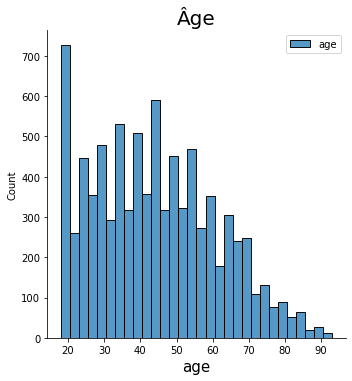

In [6]:
# Visualisation de la distribution de la variable age avec displot
plt.figure(figsize=(10,10))
sns.displot(df_age_client, x="age",)
plt.title("Âge",size=20)
plt.xlabel("age",size=15)
plt.legend(["age"])
plt.show()

In [7]:
# Affichage des différentes valeurs concernant l'âge
print("Moyenne:", round(df_age_client["age"].mean(),2))
print("Médiane:", round(df_age_client["age"].median(),2))
print("Mode:", round(df_age_client["age"].mode()[0],2))
print("Variance:", round(df_age_client["age"].var(ddof=0),2))
print("Écart type:", round(df_age_client["age"].std(ddof=0),2))
print("Min:", round(df_age_client["age"].min(),2))
print("Max:", round(df_age_client["age"].max(),2))
print("Coefficient d'asymétrie skewness:", round(df_age_client["age"].skew(),2))
print("Coefficient d'asymétrie kurtosis:", round(df_age_client["age"].kurtosis(),2))

Moyenne: 43.74
Médiane: 43.0
Mode: 18.0
Variance: 285.87
Écart type: 16.91
Min: 18.0
Max: 93.0
Coefficient d'asymétrie skewness: 0.36
Coefficient d'asymétrie kurtosis: -0.63


Q1 = 39.75
Q3 = 159.25
Borne minimum = -139.5
Borne maximum = 338.5
IQR =  119.5
Nombre d'outliers = 1


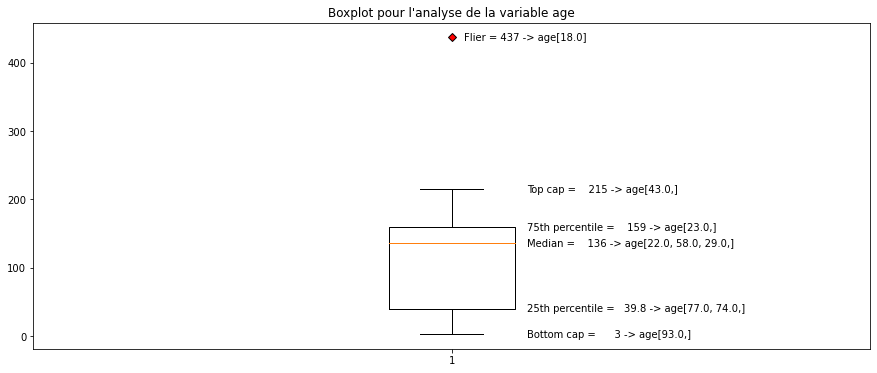

In [8]:
# Visualisation avec boxplot

effectifs = df_age_client["age"].value_counts()
# L'index de effectifs contient les modalités
modalites = effectifs.index 

# Création du tableau à partir des modalités
tab = pd.DataFrame(modalites, columns = ["age"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values

red_diamond = dict(markerfacecolor='r', marker='D')
fig3, ax3 = plt.subplots( figsize=(15, 6))
ax3.set_title("""Boxplot pour l'analyse de la variable age""")

# Création Boxplot et stockage du dictionnaire python 
my_boxplot = ax3.boxplot(tab["n"], flierprops=red_diamond,  whis=1.5)

# Appelle la fonction pour créer les étiquettes
make_labels(ax3, my_boxplot, tab, "n", "age")

plt.show()

### 1.2 Analyse univariée "sex"

In [9]:
effectifs_sex = df_enrichi["sex"].value_counts()
modalités_sex = effectifs_sex.index
Sex = pd.DataFrame(modalités_sex, columns = ["sex"])
Sex["total"] = effectifs_sex.values
Sex["pourcentage"] = round(Sex["total"] / len(df_enrichi) * 100,2)
Sex = Sex.sort_values("sex")
Sex["pourcentages_cumulés"] = round(Sex["pourcentage"].cumsum(),2)
Sex

,sex,total,pourcentage,pourcentages_cumulés
1,f,338285,49.81,49.81
0,m,340826,50.19,100.00


Nombre total des clients :  8600


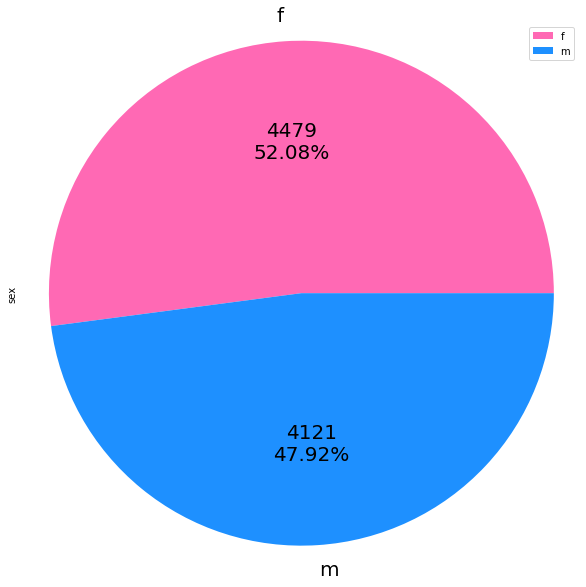

In [136]:
# visualisation de la variable sex avec piechart
df_clients = df_enrichi[['client_id', 'sex']]
df_clients = df_clients.drop_duplicates()
nbr_total_clients = len(df_clients)
print("Nombre total des clients : ", nbr_total_clients)

plt.figure(figsize=(10,10))
#df_enrichi.sex.value_counts(normalize = True).plot(kind="pie", autopct = lambda x: str(round(x, 2)) + '%')
df_clients.sex.value_counts(normalize = True).plot(kind="pie", 
                                                   autopct = lambda x: f'{x / 100 * nbr_total_clients:.0f}\n'+str(round(x, 2)) + '%'
                                                   , textprops={'fontsize': 20}
                                                   , colors= ['hotpink', 'dodgerblue' ])


plt.legend()
plt.axis("equal")
plt.show()

Nombre total des transactions :  679111


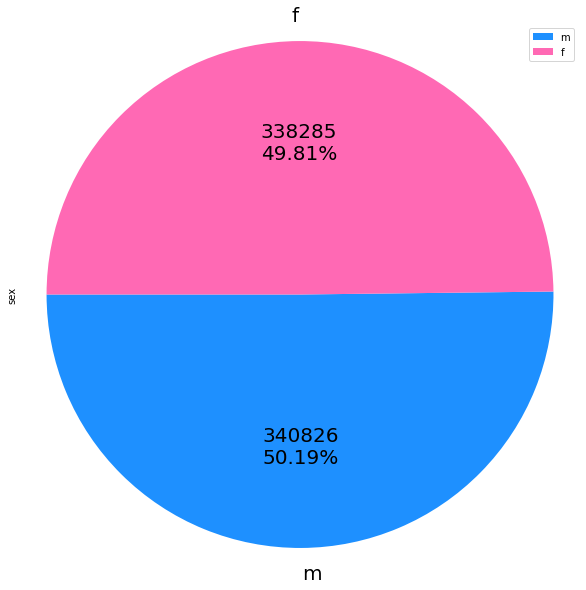

In [133]:
# visualisation de la variable sex avec piechart

nbr_total_transactions = len(df_enrichi)
print("Nombre total des transactions : ", nbr_total_transactions)

plt.figure(figsize=(10,10))
#df_enrichi.sex.value_counts(normalize = True).plot(kind="pie", autopct = lambda x: str(round(x, 2)) + '%')
df_enrichi.sex.value_counts(normalize = True).plot(kind="pie", 
                                                   autopct = lambda x: f'{x / 100 * nbr_total_transactions:.0f}\n'+str(round(x, 2)) + '%'
                                                   , textprops={'fontsize': 20}
                                                  , colors= ['dodgerblue', 'hotpink']
                                                  , startangle=180)


plt.legend()
plt.axis("equal")
plt.show()

### 1.3 Analyse univariée "price"

In [11]:
effectifs_price = df_enrichi["price"].value_counts().to_frame()
modalités_price = effectifs_price.index
Price = pd.DataFrame(modalités_price, columns = ["price"])
Price["total"] = effectifs_price.values
Price["pourcentage"] = round(Price["total"] / len(df_enrichi) * 100,2)
Price = Price.sort_values("price")
Price["pourcentages_cumulés"] = round(Price["pourcentage"].cumsum(),2)
Price

,price,total,pourcentage,pourcentages_cumulés
1102,0.62,18,0.00,0.00
1153,0.66,15,0.00,0.00
1370,0.77,5,0.00,0.00
1084,0.81,19,0.00,0.00
1318,0.88,7,0.00,0.00
...,...,...,...,...
1325,233.54,7,0.00,99.21
505,236.99,189,0.03,99.24
589,247.22,142,0.02,99.26
1278,254.44,9,0.00,99.26


<Figure size 720x720 with 0 Axes>

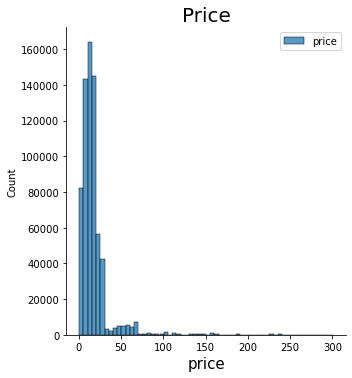

In [12]:
# Visualisation de la distribution de la variable price avec displot
plt.figure(figsize=(10,10))
sns.displot(df_enrichi, x="price", bins=300, binwidth=5)
plt.title("Price",size=20)
plt.xlabel("price",size=15)
plt.legend(["price"])
plt.show()

In [13]:
# Visualisation des tendances des prix
print("Moyenne price:", round(df_enrichi["price"].mean(),2))
print("Médiane price:", round(df_enrichi["price"].median(),2))
print("Mode price:", round(df_enrichi["price"].mode()[0],2))
print("Variance price:", round(df_enrichi["price"].var(ddof=0),2))
print("Écart type price:", round(df_enrichi["price"].std(ddof=0),2))
print("Min price;", round(df_enrichi["price"].min(),2))
print("Max price;", round(df_enrichi["price"].max(),2))
print("Coefficient d'asymétrie skewness price:", round(df_enrichi["price"].skew(),2))
print("Coefficient d'asymétrie kurtosis price:", round(df_enrichi["price"].kurtosis(),2))

Moyenne price: 17.45
Médiane price: 13.99
Mode price: 15.99
Variance price: 335.95
Écart type price: 18.33
Min price; 0.62
Max price; 300.0
Coefficient d'asymétrie skewness price: 5.39
Coefficient d'asymétrie kurtosis price: 43.07


Q1 = 20.0
Q3 = 340.5
Borne minimum = -460.75
Borne maximum = 821.25
IQR =  320.5
Nombre d'outliers = 165


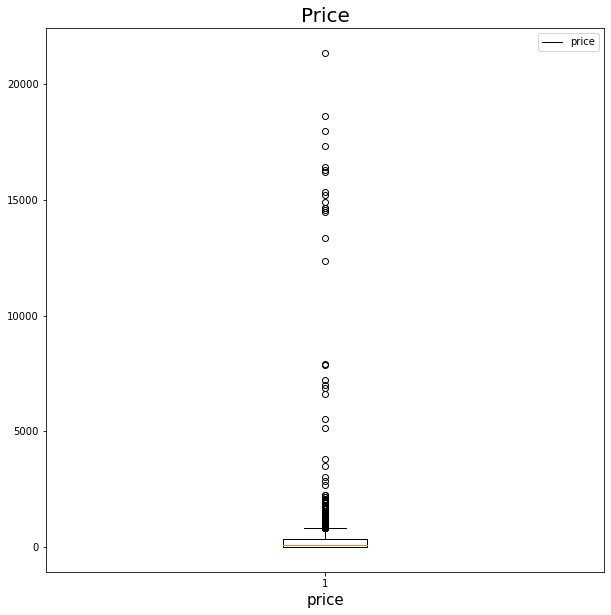

In [14]:
# Calcul interquartile
Q1= df_enrichi["price"].value_counts().quantile(q=0.25)
Q3= df_enrichi["price"].value_counts().quantile(q=0.75)

IQR= Q3 - Q1 

# Calcul des valeurs extrêmes
Lower = (Q1 - 1.5*IQR) 
Upper = (Q3 + 1.5*IQR)

# Outliers
outliers_price = effectifs_price[(effectifs_price.price > Upper) | (effectifs_price.price < Lower)]

# Visualisation
print("Q1 =", Q1)
print("Q3 =", Q3)
print("Borne minimum =", Lower)
print("Borne maximum =", Upper)
print("IQR = ", IQR)
print("Nombre d'outliers = " + str(len(outliers_price)))

# Visualisation avec boxplot
plt.figure(figsize=(10,10))
my_boxplot_price = plt.boxplot(df_enrichi["price"].value_counts())
plt.title("Price",size=20)
plt.xlabel("price",size=15)
plt.legend(["price"])
plt.show()

In [15]:
outliers_price

,price
15.99,21361
4.99,18634
10.99,17981
3.99,17351
11.99,16426
...,...
5.15,845
4.62,839
8.32,839
11.85,835


### 1.4 Analyse univariée "categ"

In [16]:
effectifs_categ = df_enrichi["categ"].value_counts()
modalités_categ = effectifs_categ.index
Categ = pd.DataFrame(modalités_categ, columns = ["categ"])
Categ["total"] = effectifs_categ.values
Categ["pourcentage"] = round(Categ["total"] / len(df_enrichi) * 100,2)
Categ = Categ.sort_values("categ")
Categ["pourcentages_cumulés"] = round(Categ["pourcentage"].cumsum(),2)
Categ

,categ,total,pourcentage,pourcentages_cumulés
0,0.0,415459,61.18,61.18
1,1.0,227169,33.45,94.63
2,2.0,36483,5.37,100.00


Nombre des produits :  3265


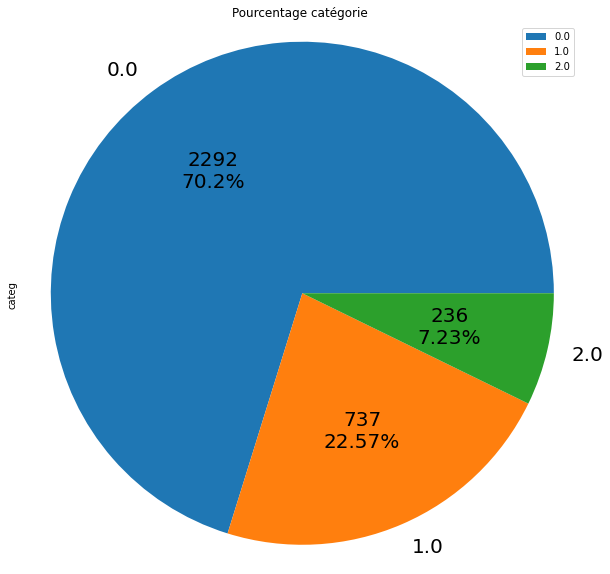

In [143]:
# visualisation de la variable categ avec piechart
df_prods = df_enrichi[['id_prod', 'categ']]
df_prods = df_prods.drop_duplicates()
nbr_total_products = len(df_prods)
print("Nombre des produits : ", nbr_total_products)

plt.figure(figsize=(10,10))
# df_prods.categ.value_counts(normalize = True).plot(kind="pie", autopct = lambda x: str(round(x, 2))+'%')
df_prods.categ.value_counts().plot(kind="pie", 
                                   autopct = lambda x: f'{x / 100 * nbr_total_products:.0f}\n'+str(round(x, 2))+'%',
                                   textprops={'fontsize': 20})

plt.title("Pourcentage catégorie")
plt.legend()
plt.axis("equal")
plt.show()

Nombre des transactions :  679111


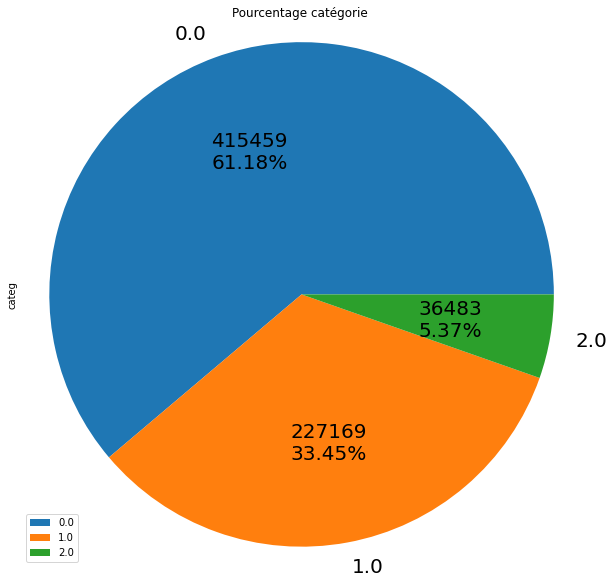

In [144]:
# visualisation de la variable categ avec piechart

nbr_total_transactions = len(df_enrichi)
print("Nombre des transactions : ", nbr_total_transactions)

plt.figure(figsize=(10,10))
# df_prods.categ.value_counts(normalize = True).plot(kind="pie", autopct = lambda x: str(round(x, 2))+'%')
df_enrichi.categ.value_counts().plot(kind="pie", 
                                   autopct = lambda x: f'{x / 100 * nbr_total_transactions:.0f}\n'+str(round(x, 2))+'%',
                                   textprops={'fontsize': 20})

plt.title("Pourcentage catégorie")
plt.legend()
plt.axis("equal")
plt.show()

<Figure size 720x720 with 0 Axes>

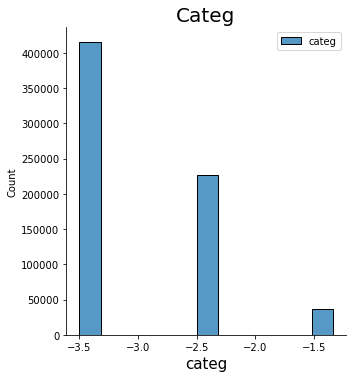

In [18]:
# Visualisation categ
plt.figure(figsize=(10,10))
sns.displot(df_enrichi, x="categ", shrink=8)
plt.title("Categ",size=20)
plt.xlabel("categ",size=15)
plt.legend(["categ"])
plt.show()